***
***

# Introduction to Neural Network


***
***

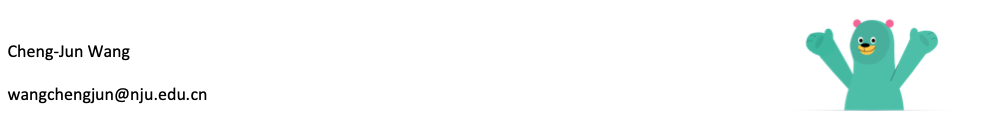

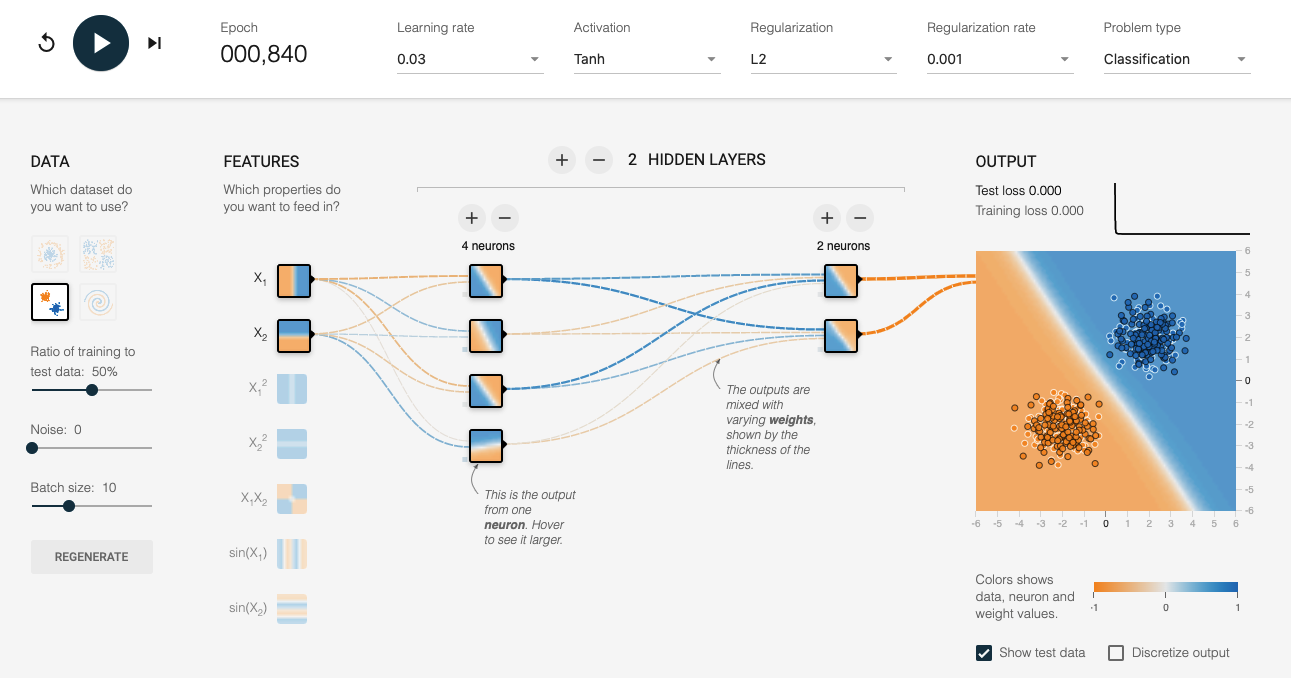

http://playground.tensorflow.org/

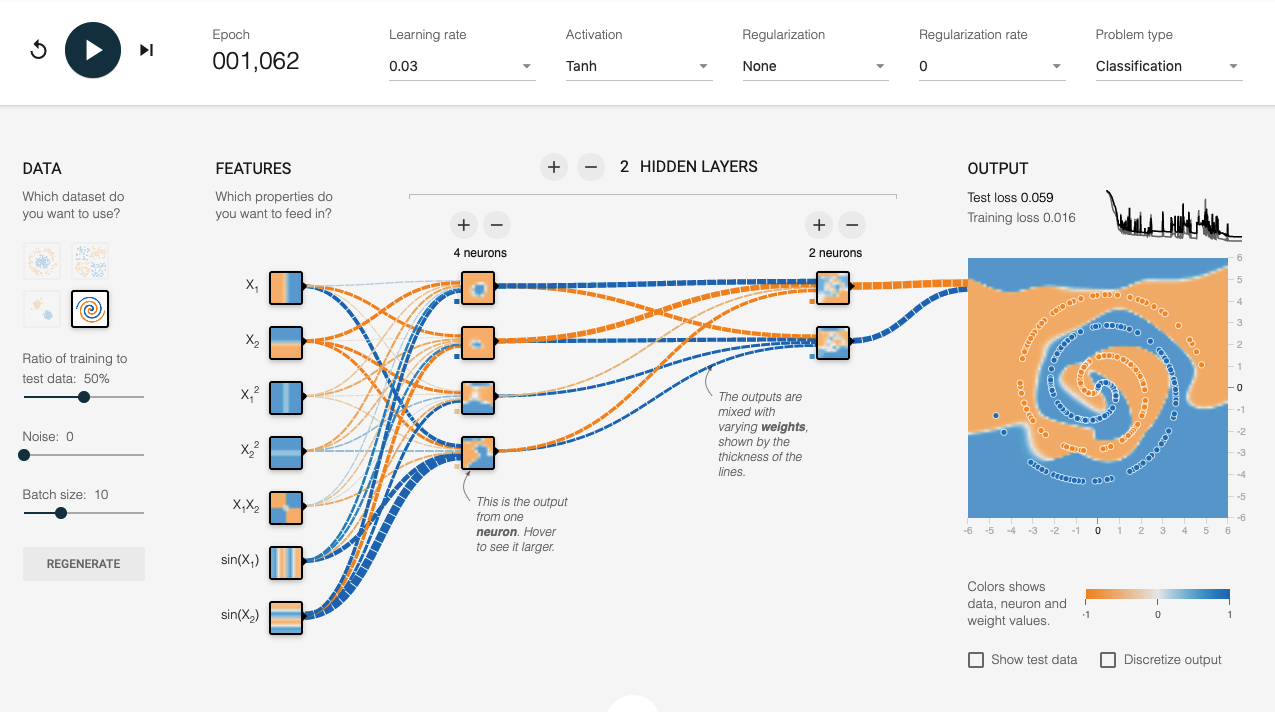

## Batch, Iteration, & Epoch

Batch Size is the total number of training examples present in a single batch.

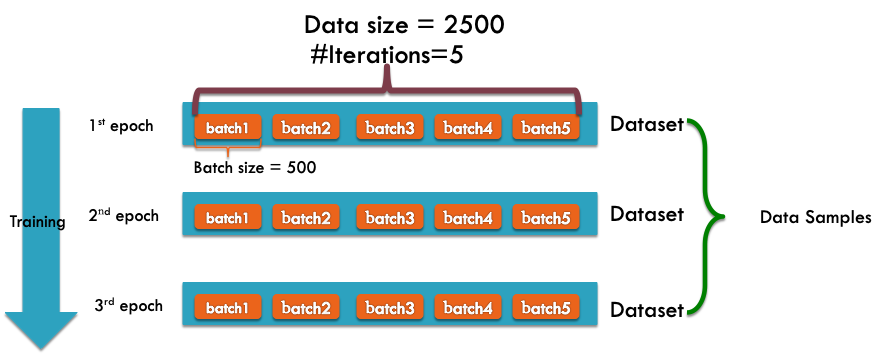


Note: The number of batches is equal to number of iterations for one epoch. Batch size and number of batches (iterations) are two different things.


Let’s say we have 2000 training examples that we are going to use .

We can divide the dataset of 2000 examples into batches of 500 then it will take 4 iterations to complete 1 epoch.

Where Batch Size is 500 and Iterations is 4, for 1 complete epoch.

## Gradient Descent

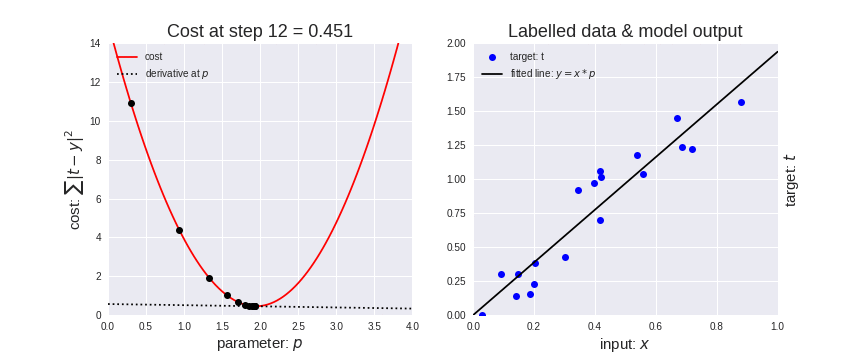

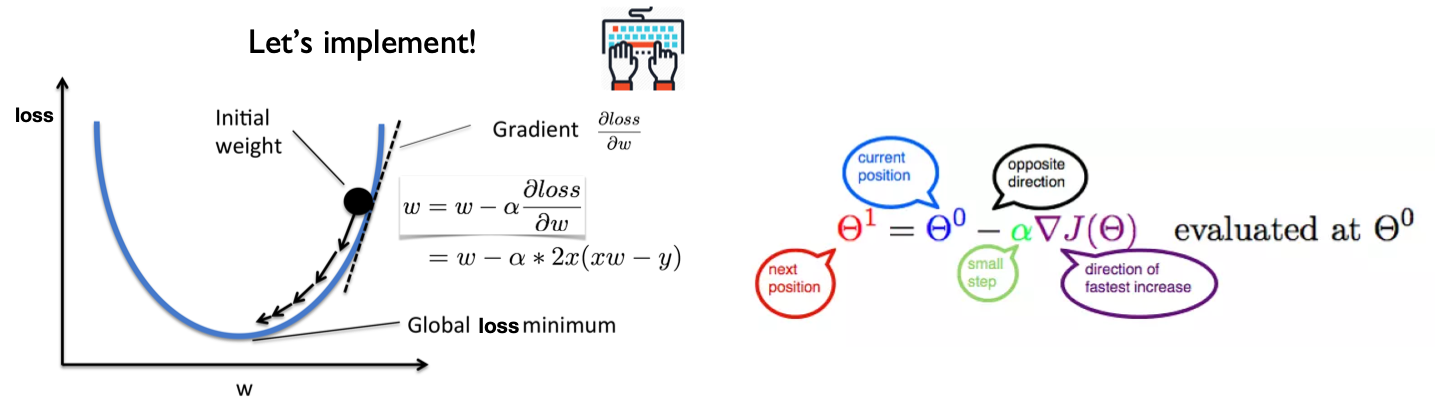

Let's represent parameters as $\Theta$, learning rate as $\alpha$, and gradient as $\bigtriangledown J(\Theta)$, 

### Mannual Gradient

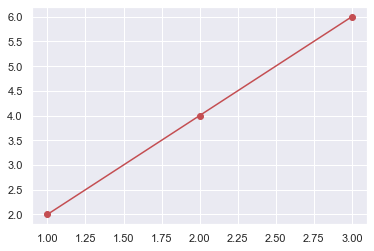

In [158]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

x_data = [1.0, 2.0, 3.0]
y_data = [2.0, 4.0, 6.0]

plt.plot(x_data, y_data, 'r-o');

In [159]:
# our model for the forward pass
def forward(x):
    return x * w

# Loss function
def loss(y_pred, y_val):
    return (y_pred - y_val) ** 2


In [160]:
# List of weights/Mean square Error (Mse) for each input
w_list = []
mse_list = []

for w in np.arange(0.0, 4.1, 0.1):
    # Print the weights and initialize the lost
    #print("w=", w)
    l_sum = 0
    for x_val, y_val in zip(x_data, y_data):
        # For each input and output, calculate y_hat
        # Compute the total loss and add to the total error
        y_pred = forward(x_val)
        l = loss(y_pred, y_val)
        l_sum += l
        #print("\t", x_val, y_val, y_pred_val, l)
    # Now compute the Mean squared error (mse) of each
    # Aggregate the weight/mse from this run
    #print("MSE=", l_sum / 3)
    w_list.append(w)
    mse_list.append(l_sum / 3)

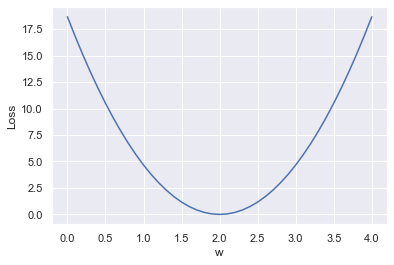

In [161]:
# Plot it all
plt.plot(w_list, mse_list)
plt.ylabel('Loss')
plt.xlabel('w')
plt.show()

In [162]:
# compute gradient
def gradient(x, y):  # d_loss/d_w
    return 2 * x * (x * w - y)

# Training loop
for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        # Compute derivative w.r.t to the learned weights
        # Update the weights
        # Compute the loss and print progress
        grad = gradient(x_val, y_val)
        w = w - 0.01 * grad
        #print("\tgrad: ", x_val, y_val, round(grad, 2))
        y_pred = forward(x_val)
        l = loss(y_pred, y_val)
print("progress:", epoch, "w=", round(w, 2), "loss=", round(l, 2))

progress: 99 w= 2.0 loss= 0.0


### Auto Gradient

In [163]:
import torch
w = torch.tensor([1.0], requires_grad=True)

In [164]:
# Training loop
for epoch in range(100):
    for x_val, y_val in zip(x_data, y_data):
        y_pred = forward(x_val) # 1) Forward pass
        l = loss(y_pred, y_val) # 2) Compute loss
        l.backward() # 3) Back propagation to update weights
        #print("\tgrad: ", x_val, y_val, w.grad.item())
        w.data = w.data - 0.01 * w.grad.item()
        # Manually zero the gradients after updating weights
        w.grad.data.zero_()

print(f"Epoch: {epoch} | Loss: {l.item()}")

Epoch: 99 | Loss: 9.094947017729282e-13


In [165]:
w.data

tensor([2.0000])

### Pytorch  Rhythm

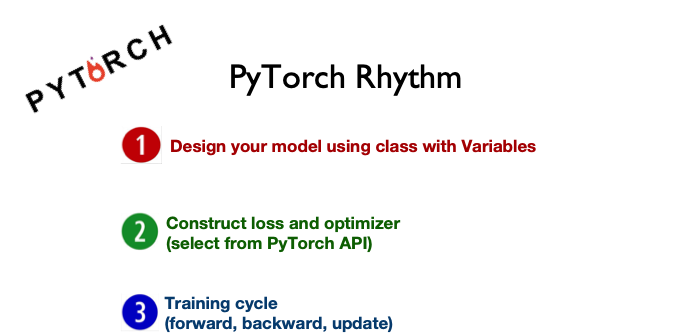

In [176]:
from torch import nn
import torch
from torch import tensor
from torch import sigmoid

x_data = tensor([[1.0], [2.0], [3.0]])
y_data = tensor([[2.0], [4.0], [6.0]])

In [181]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        y_pred = self.linear(x)
        return y_pred

In [182]:
# our model
model = Model()
# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = torch.nn.MSELoss(reduction='sum')
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

In [183]:
# Training loop
for k, epoch in enumerate(range(500)):
    # 1) Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # 2) Compute and print loss
    loss = criterion(y_pred, y_data)
    if k%100==0:
        print(f'Epoch: {epoch} | Loss: {loss.item()} ')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch: 0 | Loss: 67.08396911621094 
Epoch: 100 | Loss: 0.06363776326179504 
Epoch: 200 | Loss: 0.014963621273636818 
Epoch: 300 | Loss: 0.0035185329616069794 
Epoch: 400 | Loss: 0.0008273291168734431 


In [184]:
# After training
hour_var = tensor([[4.0]])
y_pred = model(hour_var)
print("Prediction (after training)",  4, model(hour_var).data[0][0].item())

Prediction (after training) 4 7.98384952545166


## Regression

Let’s start with a simple example of House Price. 
- Say you’re helping a friend who wants to buy a house.

- She was quoted $400,000 for a 2000 sq ft house (185 meters). 

Is this a good price or not?

So you ask your friends who have bought houses in that same neighborhoods, and you end up with three data points:



| Area (sq ft) (x)  |  Price (y)   |  
| -------------|:-------------:|
|2,104|399,900|
|1,600|329,900|
|2,400|369,000|


$$y = f(X) = W X$$

- Calculating the prediction is simple multiplication.
- But before that, we need to think about the weight we’ll be multiplying by. 
- “training” a neural network just means finding the weights we use to calculate the prediction.


A simple predictive model (“regression model”)
- takes an input, 
- does a calculation, 
- and gives an output 



<img src= 'img/neuralnetwork/data_points_graph_animated.gif' width= "700px">

Model Evaluation
- If we apply our model to the three data points we have, how good of a job would it do?


<img src= 'img/neuralnetwork/data_points_error_animated.gif' width= "700px">


<img src= 'img/neuralnetwork/model_evaluation.png' width= "500px">

**Loss Function**

how bad our prediction is

- For each point, the error is measured by the difference between the **actual value** and the **predicted value**, raised to the power of 2. 
- This is called **Mean Square Error**. 


<img src= 'img/neuralnetwork/lines_and_errors_animated.gif' width= "700px">

- We can't improve much on the model by varying the weight any more. 
- But if we add a bias (intercept) we can find values that improve the model.

<img src= 'img/neuralnetwork/NNs_bias_2.png' width= "500px">

$$y = 0.1 X + 150$$

**Gradient Descent**

- Automatically get the correct weight and bias values 
- minimize the loss function.

<img src= 'img/neuralnetwork/gd.png' width= "700px">



Regression

<img src= 'img/neuralnetwork/NNs_2_variables.png' width= "500px">



In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.autograd import Variable
import numpy as np

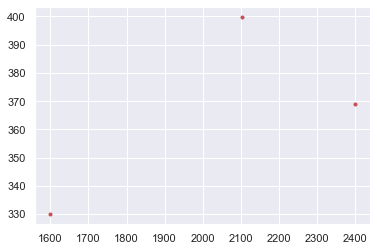

In [67]:
x_train = np.array([[2104],[1600],[2400]], dtype=np.float32)
y_train = np.array([[399.900], [329.900], [369.000]], dtype=np.float32)

plt.plot(x_train, y_train, 'r.')
plt.show()

In [69]:
x_train = torch.from_numpy(x_train)
y_train = torch.from_numpy(y_train)

**nn.Linear**

> help(nn.Linear)

Applies a linear transformation to the incoming data: $y = xA^T + b$

- **in_features**: size of each input sample
- **out_features**: size of each output sample
- **bias**: If set to False, the layer will not learn an additive bias. Default: ``True``

In [70]:
# Linear Regression Model
class LinearRegression(nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = nn.Linear(1, 1)  # input and output is 1 dimension

    def forward(self, x):
        out = self.linear(x)
        return out

model = LinearRegression()

In [71]:
# Define Loss and Optimizatioin function
criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=1e-9)#1e-4)

> help(nn.MSELoss)

To measures the **mean squared error** (squared L2 norm) between each element in the input `x` and target `y`.

> help(optim.SGD)

Implements **stochastic gradient descent** (optionally with momentum).

In [72]:
num_epochs = 1000
for epoch in range(num_epochs):
    inputs = Variable(x_train)
    target = Variable(y_train) 
    # forward
    out = model(inputs)
    loss = criterion(out, target)
    # backward
    optimizer.zero_grad() # Clears the gradients of all optimized
    loss.backward()
    optimizer.step() # Performs a single optimization step.

    if (epoch+1) % 50 == 0:
        print('Epoch[{}/{}], loss: {:.6f}'
              .format(epoch+1, num_epochs, loss.data.item()))


Epoch[50/1000], loss: 524703.812500
Epoch[100/1000], loss: 224658.125000
Epoch[150/1000], loss: 96851.820312
Epoch[200/1000], loss: 42411.964844
Epoch[250/1000], loss: 19222.966797
Epoch[300/1000], loss: 9345.485352
Epoch[350/1000], loss: 5138.111816
Epoch[400/1000], loss: 3345.956299
Epoch[450/1000], loss: 2582.575439
Epoch[500/1000], loss: 2257.412354
Epoch[550/1000], loss: 2118.905518
Epoch[600/1000], loss: 2059.905518
Epoch[650/1000], loss: 2034.777222
Epoch[700/1000], loss: 2024.072266
Epoch[750/1000], loss: 2019.512207
Epoch[800/1000], loss: 2017.569946
Epoch[850/1000], loss: 2016.742554
Epoch[900/1000], loss: 2016.390259
Epoch[950/1000], loss: 2016.241577
Epoch[1000/1000], loss: 2016.177734


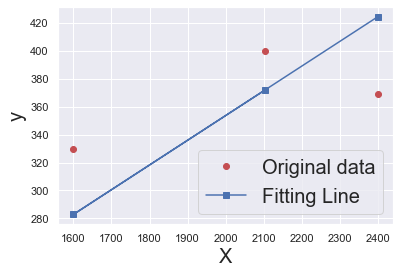

In [73]:
predict = model(Variable(x_train))
predict = predict.data.numpy()
plt.plot(x_train.numpy(), y_train.numpy(), 'ro', label='Original data')
plt.plot(x_train.numpy(), predict, 'b-s', label='Fitting Line')
plt.xlabel('X', fontsize= 20)
plt.ylabel('y', fontsize= 20)
plt.legend( fontsize= 20)
plt.show()

### Have a try

In [74]:
x_train = np.array([[3.3], [4.4], [5.5], [6.71], [6.93], [4.168],
                    [9.779], [6.182], [7.59], [2.167], [7.042],
                    [10.791], [5.313], [7.997], [3.1]], dtype=np.float32)

y_train = np.array([[1.7], [2.76], [2.09], [3.19], [1.694], [1.573],
                    [3.366], [2.596], [2.53], [1.221], [2.827],
                    [3.465], [1.65], [2.904], [1.3]], dtype=np.float32)

## Classification

<img src= 'img/neuralnetwork/softmax-regression-scalargraph.png' width= "500px">



### Activation Function


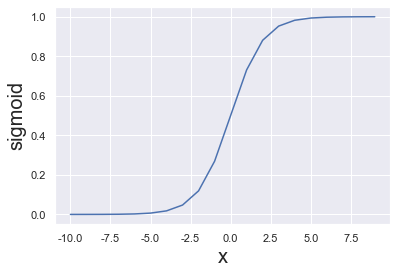

In [186]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

plt.plot(range(-10, 10), [sigmoid(i) for i in range(-10, 10)])
plt.xlabel('x', fontsize = 20)
plt.ylabel('sigmoid', fontsize = 20);

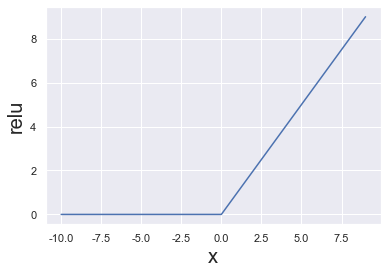

In [187]:
# Naive scalar relu implementation. 
# In the real world, most calculations are done on vectors
def relu(x):
    if x < 0:
        return 0
    else:
        return x


plt.plot(range(-10, 10), [relu(i) for i in range(-10, 10)])
plt.xlabel('x', fontsize = 20)
plt.ylabel('relu', fontsize = 20);

### Softmax

The softmax function, also known as softargmax or normalized exponential function, is a function that takes as input a vector of K real numbers, and normalizes it into a probability distribution consisting of K probabilities. 

$$softmax = \frac{e^x}{\sum e^x}$$


In [79]:
def softmax(s):
    return np.exp(s) / np.sum(np.exp(s), axis=0)

softmax([1.0, 2.0, 3.0, 4.0, 1.0, 2.0, 3.0])

array([0.02364054, 0.06426166, 0.1746813 , 0.474833  , 0.02364054,
       0.06426166, 0.1746813 ])

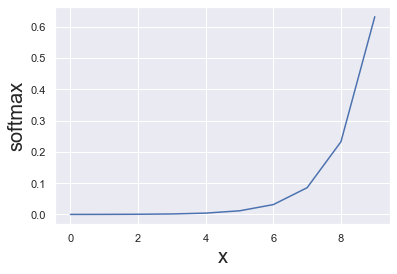

In [80]:
plt.plot(range(10), softmax(range(10)))
plt.xlabel('x', fontsize = 20)
plt.ylabel('softmax', fontsize = 20);

Softmax is often used in neural networks, to map the non-normalized output of a network to a probability distribution over predicted output classes.

- Prior to applying softmax, some vector components could be negative, or greater than one; and might not sum to 1;
- After applying softmax, each component will be in the interval (0,1), and the components will add up to 1, so that they can be interpreted as probabilities. Furthermore, the larger input components will correspond to larger probabilities. 



### Logistic Regression 

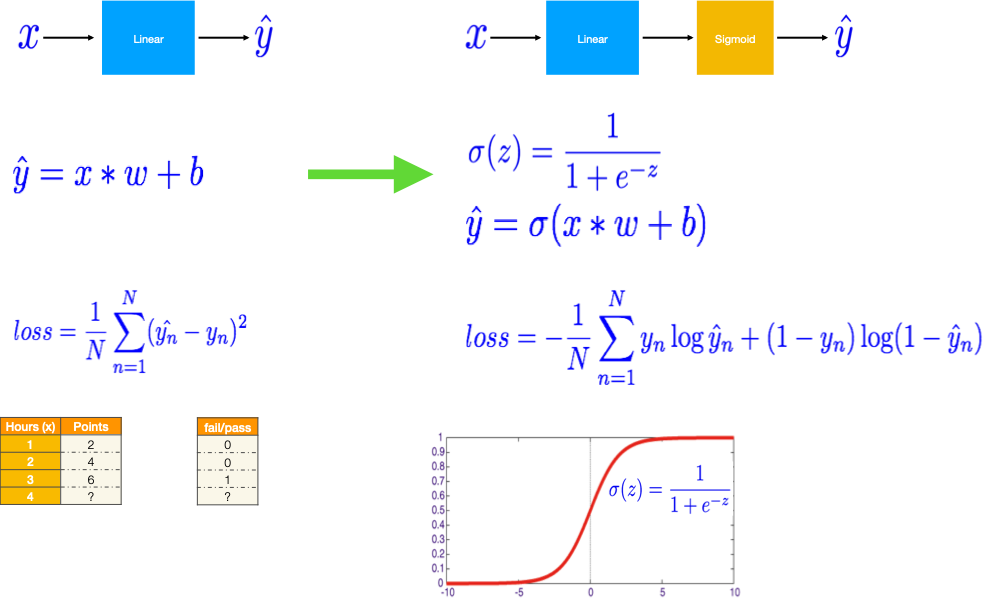

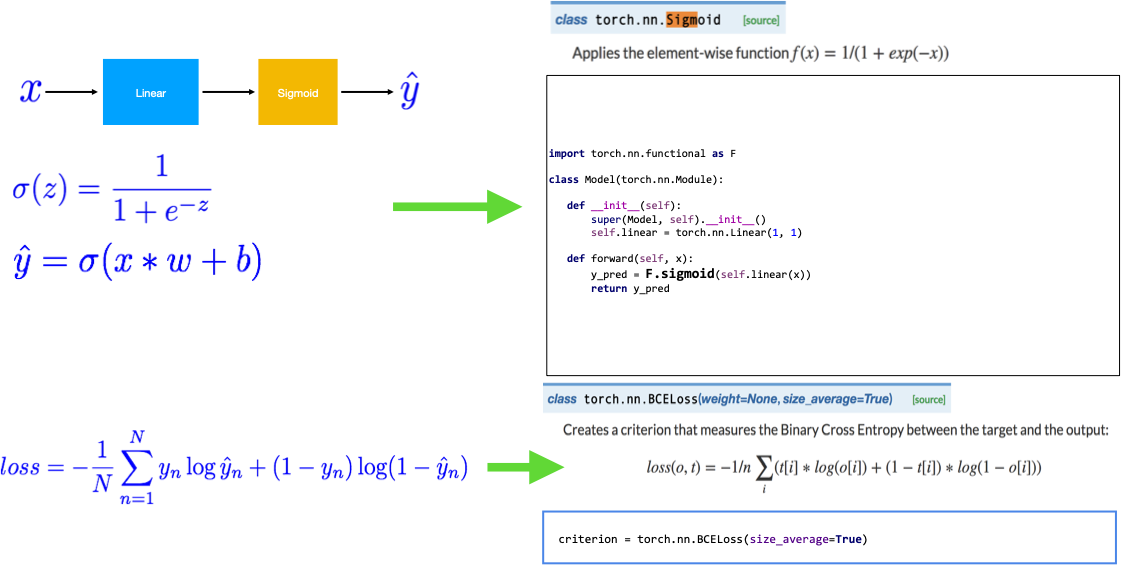

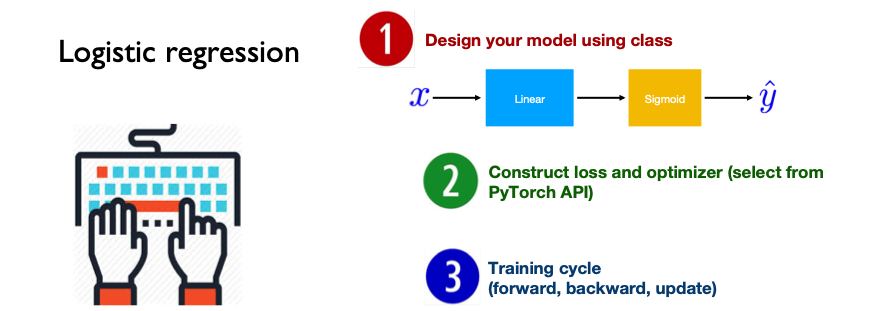

In [188]:
from torch import tensor
from torch import nn
from torch import sigmoid
import torch.nn.functional as F
import torch.optim as optim

# Training data and ground truth
x_data = tensor([[1.0], [2.0], [3.0], [4.0]])
y_data = tensor([[0.], [0.], [1.], [1.]])

In [189]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate nn.Linear module
        """
        super(Model, self).__init__()
        self.linear = nn.Linear(1, 1)  # One in and one out

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data.
        """
        y_pred = sigmoid(self.linear(x))
        return y_pred

In [190]:
# our model
model = Model()

# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [192]:
# Training loop
for k, epoch in enumerate(range(1000)):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    if k%100==0:
        print(f'Epoch {epoch + 1}/1000 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 1/1000 | Loss: 0.3840
Epoch 101/1000 | Loss: 0.3748
Epoch 201/1000 | Loss: 0.3661
Epoch 301/1000 | Loss: 0.3579
Epoch 401/1000 | Loss: 0.3501
Epoch 501/1000 | Loss: 0.3427
Epoch 601/1000 | Loss: 0.3357
Epoch 701/1000 | Loss: 0.3290
Epoch 801/1000 | Loss: 0.3226
Epoch 901/1000 | Loss: 0.3166


In [198]:
# After training
print(f'Let\'s predict the hours need to score above 50%\n{"=" * 50}')
y_pred = model(tensor([[1.0]]))
print(f'Prediction for x = 1.0, y_pred = {y_pred.item():.4f} | Above 50%: {y_pred.item() > 0.5}')
y_pred = model(tensor([[7.0]]))
print(f'Prediction for x = 7.0, y_pred = {y_pred.item():.4f} | Above 50%: { y_pred.item() > 0.5}')


Let's predict the hours need to score above 50%
Prediction for x = 1.0, y_pred = 0.1998 | Above 50%: False
Prediction for x = 7.0, y_pred = 0.9969 | Above 50%: True


####  Diabetes Classification

In [199]:
from torch import nn, optim, from_numpy
import numpy as np

xy = np.loadtxt('../data/diabetes.csv.gz', delimiter=',', dtype=np.float32)
x_data = from_numpy(xy[:, 0:-1])
y_data = from_numpy(xy[:, [-1]])
print(f'X\'s shape: {x_data.shape} | Y\'s shape: {y_data.shape}')

X's shape: torch.Size([759, 8]) | Y's shape: torch.Size([759, 1])


In [200]:
class Model(nn.Module):
    def __init__(self):
        """
        In the constructor we instantiate two nn.Linear module
        """
        super(Model, self).__init__()
        self.l1 = nn.Linear(8, 6)
        self.l2 = nn.Linear(6, 4)
        self.l3 = nn.Linear(4, 1)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        """
        In the forward function we accept a Variable of input data and we must return
        a Variable of output data. We can use Modules defined in the constructor as
        well as arbitrary operators on Variables.
        """
        out1 = self.sigmoid(self.l1(x))
        out2 = self.sigmoid(self.l2(out1))
        y_pred = self.sigmoid(self.l3(out2))
        return y_pred

In [201]:
# our model
model = Model()


# Construct our loss function and an Optimizer. The call to model.parameters()
# in the SGD constructor will contain the learnable parameters of the two
# nn.Linear modules which are members of the model.
criterion = nn.BCELoss(reduction='mean')
optimizer = optim.SGD(model.parameters(), lr=0.1)

In [207]:
# Training loop
for k, epoch in enumerate(range(1000)):
    # Forward pass: Compute predicted y by passing x to the model
    y_pred = model(x_data)

    # Compute and print loss
    loss = criterion(y_pred, y_data)
    if k % 200 ==0:
        print(f'Epoch: {epoch + 1}/1000 | Loss: {loss.item():.4f}')

    # Zero gradients, perform a backward pass, and update the weights.
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
print(f'Epoch: {epoch + 1}/1000 | Loss: {loss.item():.4f}')

Epoch: 1/1000 | Loss: 0.6444
Epoch: 201/1000 | Loss: 0.6441
Epoch: 401/1000 | Loss: 0.6437
Epoch: 601/1000 | Loss: 0.6431
Epoch: 801/1000 | Loss: 0.6424
Epoch: 1000/1000 | Loss: 0.6413


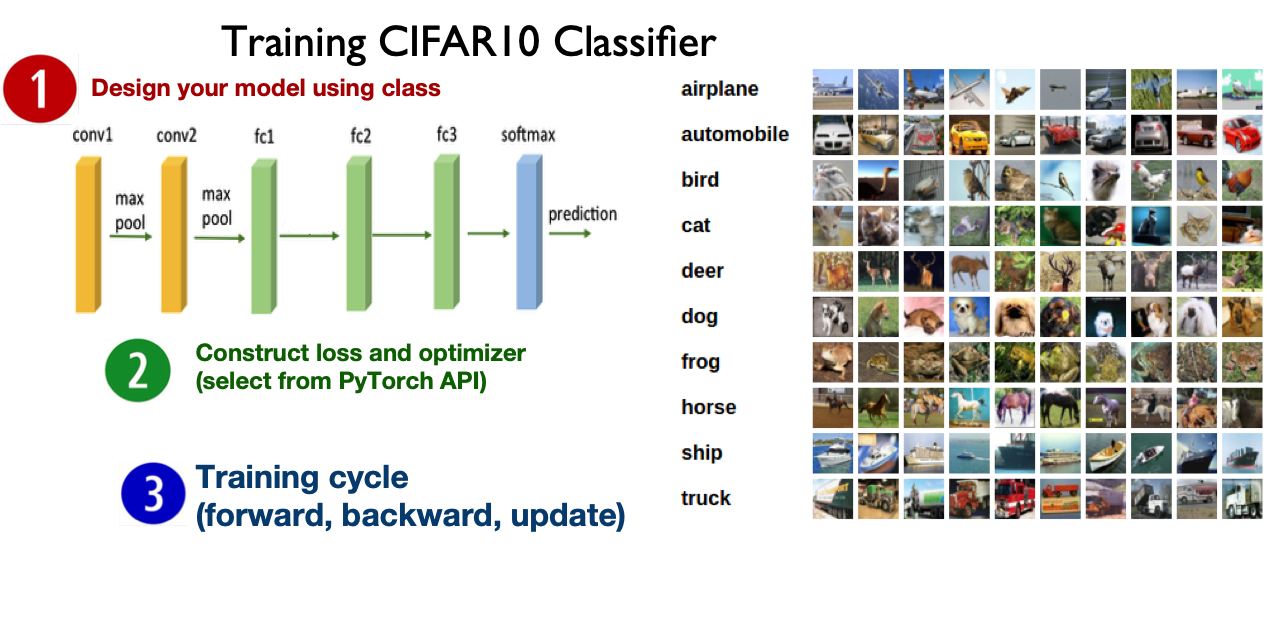

The images in CIFAR-10 are of size 3x32x32, i.e. 3-channel color images of 32x32 pixels in size. http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html 


In [214]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5) # in_channels = 3, out_channels = 6, kernel_size= 5
        self.pool = nn.MaxPool2d(2, 2) # pool of square window of size = 2, stride = 2
        self.conv2 = nn.Conv2d(6, 16, 5) # in_channels = 6, out_channels = 16, kernel_size= 5
        self.fc1 = nn.Linear(16 * 5 * 5, 120)  # in_features = 16*5*5, out_features = 120
        self.fc2 = nn.Linear(120, 84) # in_features = 120, out_features = 84
        self.fc3 = nn.Linear(84, 10)  # in_features = 84, out_features = 10

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

Run in Google Colab

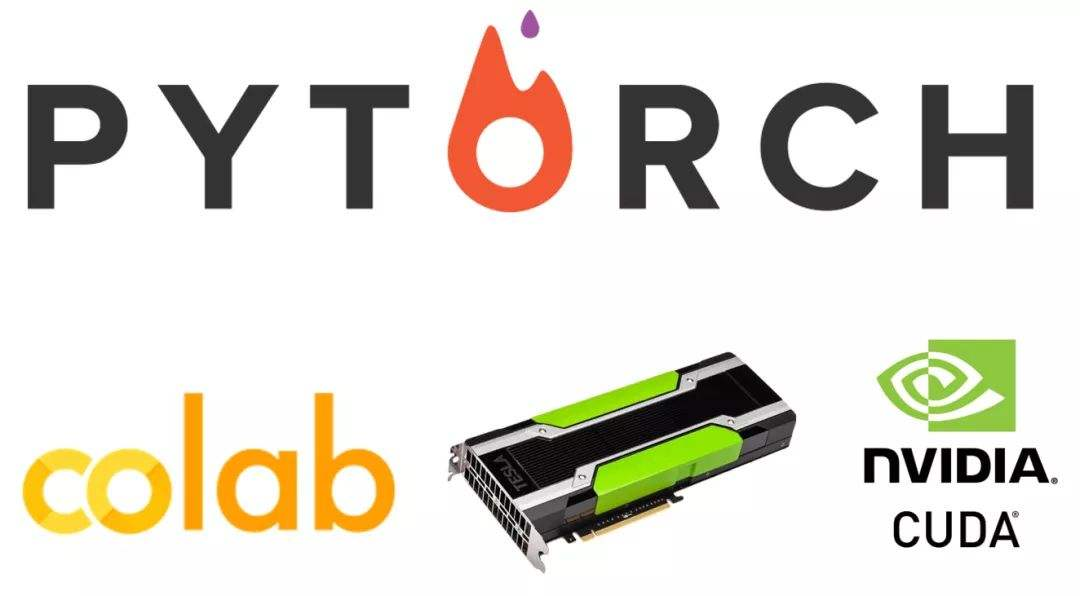

https://colab.research.google.com/github/pytorch/tutorials/blob/gh-pages/_downloads/cifar10_tutorial.ipynb



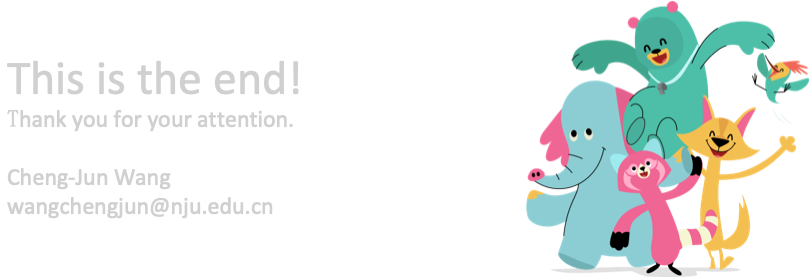

<!--NAVIGATION-->
< [In-Depth: Decision Trees and Random Forests](09.08-Random-Forests.ipynb) | [Contents](Index.ipynb) |[In-Depth: Neural Network Advanced](09.10.neural_network_advanced.ipynb)>